<a href="https://colab.research.google.com/github/joyce-ol/OIBSIP_data_analysis_taskno1/blob/main/retail_sail_for_osasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions to Explore:

How does customer age and gender influence their purchasing behavior?
Are there discernible patterns in sales across different time periods?
Which product categories hold the highest appeal among customers?
What are the relationships between age, spending, and product preferences?
How do customers adapt their shopping habits during seasonal trends?
Are there distinct purchasing behaviors based on the number of items bought per transaction?
What insights can be gleaned from the distribution of product prices within each category?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

About this file

Suggest Edits
1. **Transaction ID**: A unique identifier for each transaction, allowing tracking and reference.

2. **Date**: The date when the transaction occurred, providing insights into sales trends over time.

3. **Customer ID**: A unique identifier for each customer, enabling customer-centric analysis.

4. **Gender:** The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

5.** Age**: The age of the customer, facilitating segmentation and exploration of age-related influences.

6.** Product Category:** The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

7.** Quantity**: The number of units of the product purchased, contributing to insights on purchase volumes.

8. **Price per Unit:** The price of one unit of the product, aiding in calculations related to total spending.

9. **Total Amount:** The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')

In [ ]:
# getting the few rows from the data set
df.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [ ]:
df.dtypes


,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
#checking for missing data
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Age**: Most customers are between 29 and 53 years old.The average customer is 41 years old. There's a balanced spread with some younger adults (18+) and seniors (60+)

**Quantity**: Most customers buy 2 to 4 items per transaction. The median of 3 indicates that buying multiple items is common. The low std dev shows quantity is relatively consistent across customers.

**Price per unit**: The mean price is high due to expensive items, but the median of 50 suggests most products are low-cost.
This is a right-skewed distribution, with a few high-value items increasing the mean.
Price ranges from budget items (25) to premium (500).

**Total amount**: Most transactions are small to moderate in value.
The mean is 456, but the median is only 135, again suggesting right skew. A few very large purchases (up to 2000) increase the average.
A high standard deviation (560) indicates wide variance in spending.




In [ ]:
#data range
date_range = (df['Date'].min(), df['Date'].max())
print(f"Date Range: {date_range[0]} to {date_range[1]}")

Date Range: 2023-01-01 to 2024-01-01


In [ ]:
# Ensure that 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


In [ ]:
# Daily sales
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

In [ ]:
# monthly sales
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()

<ipython-input-13-5d0ca78f70a4>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()


Exploratory Data Analysis (EDA) for overall sales trend

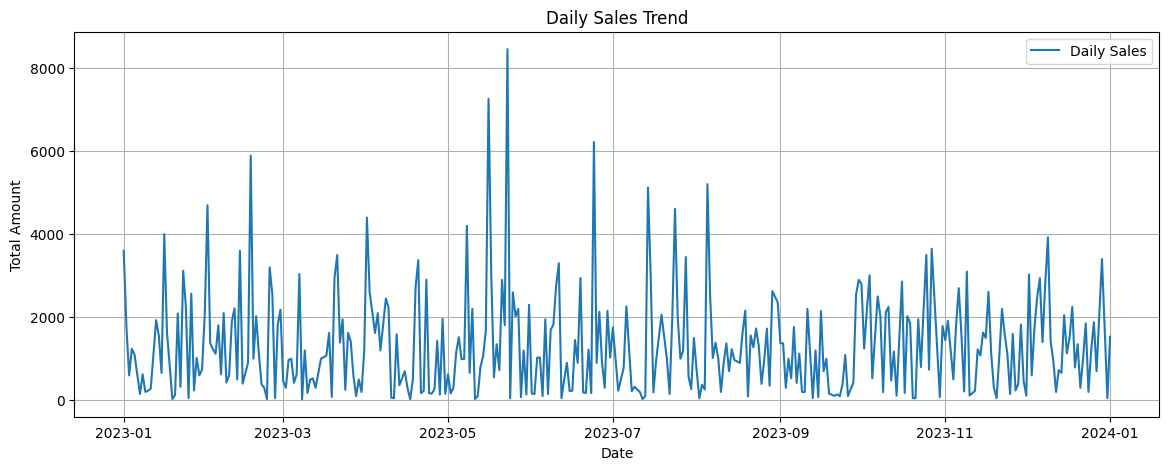

In [ ]:
# Daily trend
plt.figure(figsize=(14, 5))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.legend()
plt.show()


Observations:
1. The chart shows significant variability in daily sales over time.
2. There is a peak sales reaching up to 8000, likely during promotional periods or holidays.
3. There is a lowest Sales drop to 0 , possibly due to weekends, holidays, or stockouts.
4. Spikes in Mid-2023 (May–July) Could indicate seasonal demand (e.g., summer sales, festivals).


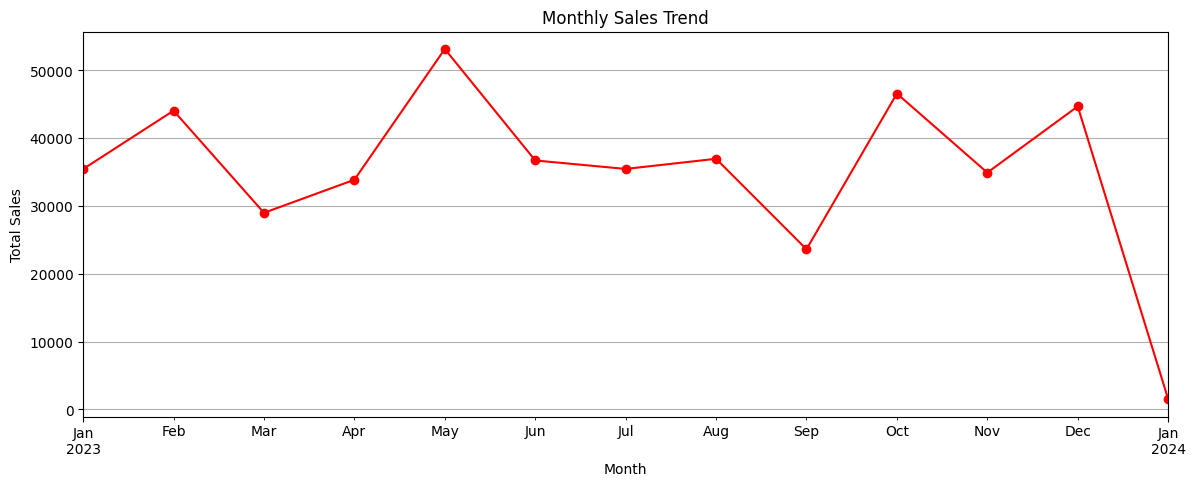

In [ ]:
# Monthly Trend
plt.figure(figsize=(14, 5))
monthly_sales.plot(marker='o', color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


      Observation:
1.High sales period around May, October, December these might be due to
holiday seasons, marketing campaigns, or sales events (e.g., summer promos, Black Friday, Christmas).

2.Low Sales Periods around March, September, and January 2024 are the weakest.These could be as a result of  inventory issues, data gaps, customer fatigue.

3.Mid-Year Stability June, July, and August show little movement, indicating a steady, unspectacular performance — possibly business as usual with no external push.


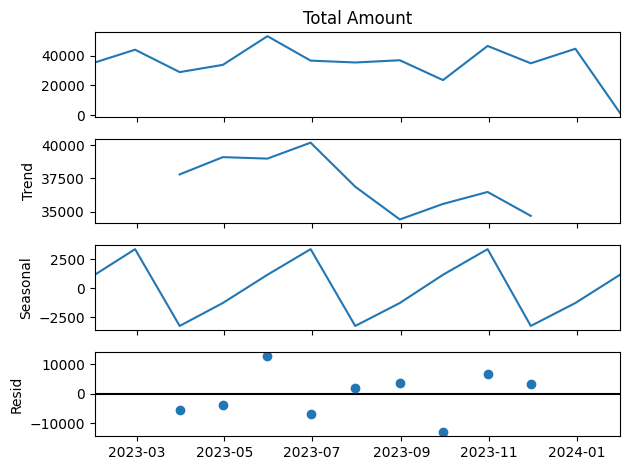

In [ ]:
#Time Series Decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive', period=4)
decomposition.plot()
plt.show()

    Observation

The time series analysis reveals a clear seasonal pattern in total spending, with periodic peaks and dips occurring every few months.

1.Top plot(Total amount):is the actual monthly sales over the time period (Feb 2023 – Jan 2024).
You see peaks around Apr, Jul, Oct, and Dec, indicating likely sales bursts.
There’s a sharp drop in Jan 2024, possibly due to post-holiday low activity. This shows that Sales fluctuate considerably month to month, not flat or purely linear.

2.Second plot(Trend): This smooth line represents the underlying direction of sales over time, with short-term fluctuations removed. This indicate that Sales showed strength in mid-2023 but weakened in the latter half, suggesting either seasonality or market factors (like reduced demand or product fatigue).

3.Third plot(seasonal):This component shows repeating monthly patterns that remain consistent across the year.This component shows repeating monthly patterns that remain consistent across the year.

4.Last plot(Residual): This shows what’s left after removing trend and seasonality — effectively the unexplained or random variation.There are a few unusual months where something unexpected happened (e.g., promotions, external events, supply issues).


Customers and product analysis

In [ ]:
# creating a Age group column
bins =[18,25, 35, 45, 55 , 65, ]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65',]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df[['Age', 'Age Group']].head())


   Age Age Group
0   34     26-35
1   26     26-35
2   50     46-55
3   37     36-45
4   30     26-35


In [ ]:
# average spend by gender
average_spend_by_gender = df.groupby('Gender')['Total Amount'].mean()
print(average_spend_by_gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


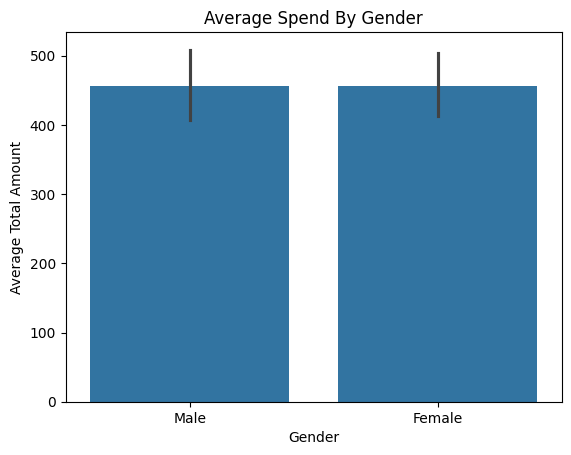

In [ ]:
# bar chart showing average spend by gender
sns.barplot(data = df , x = 'Gender', y = 'Total Amount', estimator = 'mean')
plt.title('Average Spend By Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Amount')
plt.show()

The bar chart show that Both genders demonstrate a comparable spending pattern, at least on average, within the observed population.

In [ ]:
#average spend by age gruop
average_spend_by_age_group = df.groupby('Age Group')['Total Amount'].mean()
print(average_spend_by_age_group)

Age Group
18-25    501.006711
26-35    478.275862
36-45    467.801932
46-55    432.155556
56-65    417.546296
Name: Total Amount, dtype: float64


<ipython-input-20-19b73d6b242a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spend_by_age_group = df.groupby('Age Group')['Total Amount'].mean()


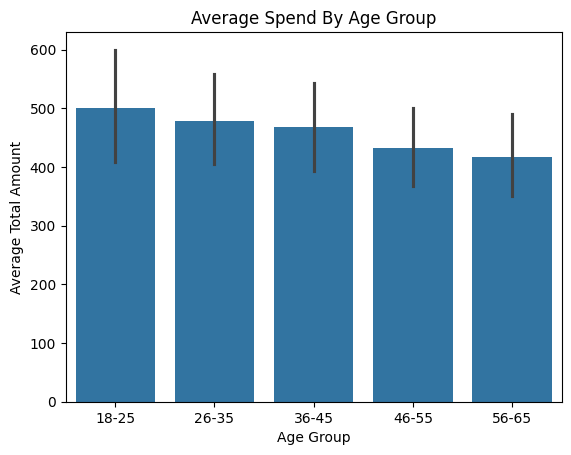

In [ ]:
#Bar chart for average spend by age age group
sns.barplot(data = df , x = 'Age Group', y = 'Total Amount', estimator = 'mean', order = labels)
plt.title('Average Spend By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Amount')
plt.show()

      Observation:
There is a clear decreasing trend in average spend as age increases.
Younger consumers (especially 18–25) tend to spend more on average, although with greater variability.
Older age groups (46+) show lower and more consistent spending patterns.



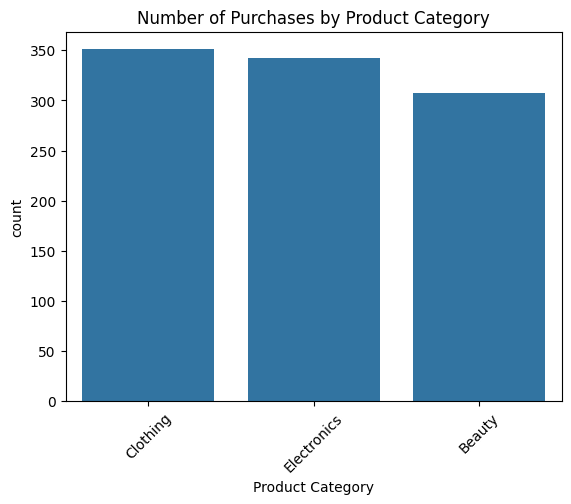

In [ ]:
#  Purchase Count by Product Category
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Number of Purchases by Product Category')
plt.xticks(rotation=45)
plt.show()


    Key Insights:
All three categories are popular, but Clothing leads in purchase volume.
The differences are not drastic, suggesting a balanced interest across categories with a slight preference for Clothing.

<ipython-input-26-484e49327362>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  age_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Age Group'])['Total Amount'].sum().unstack()
<ipython-input-26-484e49327362>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Age Group'])['Total Amount'].sum().unstack()


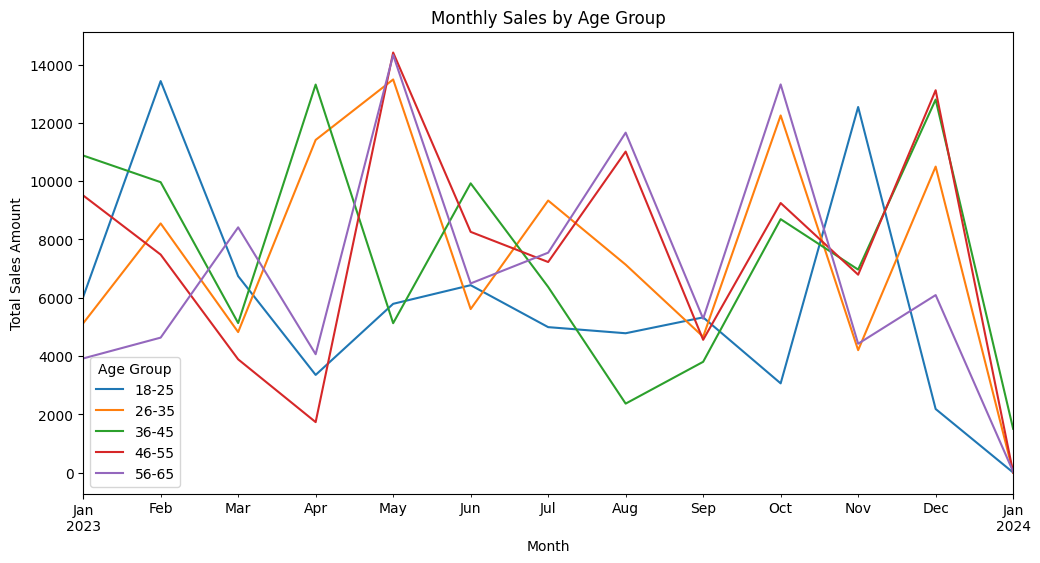

In [ ]:
# Age group monthly spend trend
age_monthly = df.groupby([pd.Grouper(key='Date', freq='M'), 'Age Group'])['Total Amount'].sum().unstack()
age_monthly.plot(figsize=(12, 6))
plt.title('Monthly Sales by Age Group')
plt.ylabel('Total Sales Amount')
plt.xlabel('Month')
plt.show()

This chart shows seasonal buying patterns with age-specific peaks around May, October, and December. The 46–55 and 56–65 groups tend to have the highest peak values, suggesting they might be the biggest spenders during high-sales months. Meanwhile, 18–25 shows erratic behavior, possibly reflecting lower and less predictable spending.

<ipython-input-28-a14350cd0dc7>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values='Total Amount', index='Age Group',  columns='Product Category', aggfunc='mean')


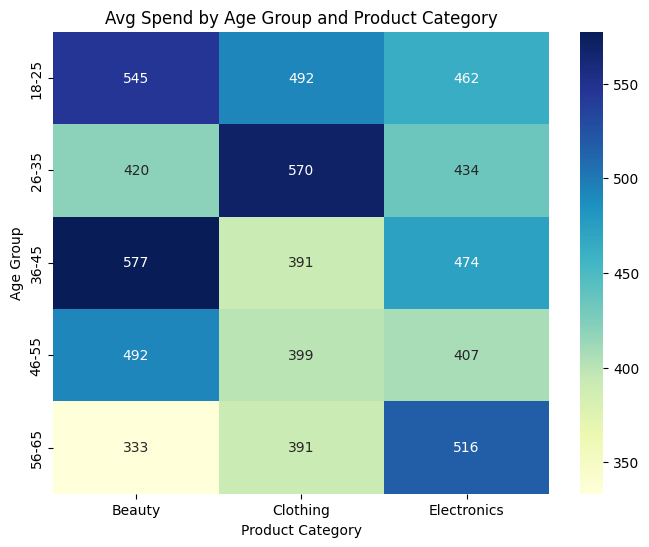

In [ ]:
pivot = pd.pivot_table(df, values='Total Amount', index='Age Group',  columns='Product Category', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Avg Spend by Age Group and Product Category')
plt.ylabel('Age Group')
plt.xlabel('Product Category')
plt.show()


Younger consumers (18–25, 26–35) spend more on Beauty and Clothing.

Older consumers (56–65) shift focus to Electronics.

36–45 is the top age group for Beauty, while 26–35 dominates Clothing spending.

There's a notable drop in Beauty and Clothing spending after age 45, but a rise in Electronics.

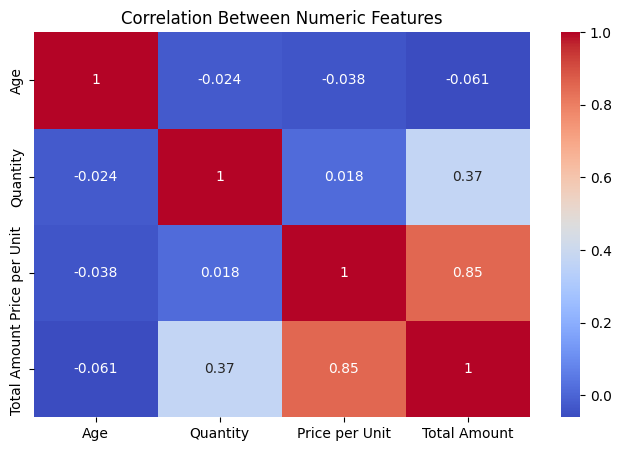

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()



Observation:

Total Amount & Price per Unit has a strong correlation of 0.85

➤ As the price per unit increases, the total amount spent increases significantly — logical and expected.

Total Amount & Quantity has a weak correlation of 0.37

➤ More quantity bought usually means higher total spend, though not as strong as price influence.

 All correlations with age (−0.024 to −0.061) are very close to 0,

 meaning:
Age does not significantly influence quantity bought, price per unit, or total amount spent.

 Quantity & Price per Unit has a weak correlation of 0.018

➤ Essentially no correlation — customers aren’t buying more or fewer items based on price.

**RECOMMENDATION**

**1.**Focus Marketing on High-Spending Demographics

Insight: Customers aged 26–45, especially females, have the highest average spending.

Action:
Target this segment with personalized promotions, loyalty programs, and early access to new products.

Use social media and influencer marketing platforms popular among this demographic.

**2.**Boost Sales in Top Categories

Insight: Clothing and Electronics are the top revenue-generating categories.

Action:
Run bundle promotions and limited-time discounts in these categories.

Introduce "Buy 2, get 1 free" or tiered discounts (e.g., 10% off if buying 3+).

**3.**Address Underperforming Categories

Insight: Some categories (e.g., possibly Beauty or others depending on the data) contribute less to revenue.

Action:
Investigate whether low performance is due to pricing, product variety, or visibility.

Use cross-sell strategies: suggest these items alongside popular purchases.

**4.**Leverage Seasonal Trends

Insight: Sales show monthly variation, with clear seasonal spikes and dips.

Action:
Align marketing campaigns with high-sales months (e.g., holidays, back-to-school)

Use historical sales data to optimize stock levels and staffing in peak months.

**5.**Gender-Sensitive Campaigns

Insight: Spending behavior varies by gender and age group.

Action:
Tailor email and ad campaigns to appeal to gender-specific preferences in product categories.

For example, promote electronics more to males aged 36–45 .

